In [5]:
import numpy as np
import pandas as pd
bikes=pd.read_csv('bikes.csv')
bikes.head()

,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600


In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  731 non-null    float64
 1   humidity     731 non-null    float64
 2   windspeed    731 non-null    float64
 3   rentals      731 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 23.0 KB


In [7]:
bikes.describe()

,temperature,humidity,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000
mean,59.509553,0.486937,9.238886,4504.348837
std,15.486114,0.185415,3.379815,1937.211452
min,22.602432,0.000000,0.932208,22.000000
25%,46.117264,0.353548,6.863568,3152.000000
50%,59.758972,0.502227,9.503508,4548.000000
75%,73.048236,0.624671,11.814559,5956.000000
max,90.497028,0.972500,21.126627,8714.000000


In [8]:
bikes[['temperature','humidity']].corr()

,temperature,humidity
temperature,1.000000,0.055479
humidity,0.055479,1.000000


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
bikes=pd.read_csv('bikes.csv')
bikes.head()

,temperature,humidity,windspeed,rentals
0,46.716528,0.815969,13.669663,985
1,48.350239,0.800497,15.199782,801
2,34.212394,0.592097,13.247558,1349
3,34.520000,0.623196,11.687963,1562
4,36.800562,0.624643,13.148281,1600


<AxesSubplot:xlabel='humidity', ylabel='rentals'>

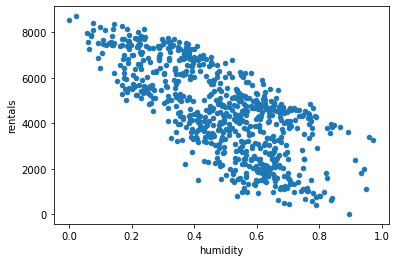

In [10]:
bikes.plot(kind='scatter',x='humidity',y='rentals')

<AxesSubplot:xlabel='windspeed', ylabel='rentals'>

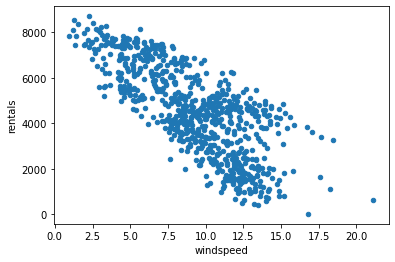

In [11]:
bikes.plot(kind='scatter',x='windspeed',y='rentals')

In [12]:
bikes.corr()

,temperature,humidity,windspeed,rentals
temperature,1.000000,0.055479,-0.024560,0.627494
humidity,0.055479,1.000000,0.898802,-0.717508
windspeed,-0.024560,0.898802,1.000000,-0.758180
rentals,0.627494,-0.717508,-0.758180,1.000000


In [13]:
#y=coef*x1(temp)+x2(hum)+coef*x3(winds)+intercept
#y=x1+x2+x3+c

In [14]:
y=bikes[['rentals']]
y

,rentals
0,985
1,801
2,1349
3,1562
4,1600
...,...
726,2114
727,3095
728,1341
729,1796


In [15]:
x=bikes.iloc[:,0:3]
x

,temperature,humidity,windspeed
0,46.716528,0.815969,13.669663
1,48.350239,0.800497,15.199782
2,34.212394,0.592097,13.247558
3,34.520000,0.623196,11.687963
4,36.800562,0.624643,13.148281
...,...,...,...
726,39.102528,0.482493,10.801229
727,39.031972,0.480433,8.996301
728,39.031972,0.717730,11.829425
729,39.243472,0.523039,12.805314


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [17]:
len(y_train)

548

In [18]:
len(x_test)

183

In [19]:
548/731

0.7496580027359782

In [20]:
183/731

0.2503419972640219

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train,y_train)

In [22]:
model.intercept_

array([3792.70001626])

In [23]:
model.coef_

array([[   80.77612995, -4643.02151357,  -199.84486507]])

In [24]:
model.rank_

3

In [25]:
model.singular_

array([350.50721439,  79.18425379,   1.90360673])

In [26]:
model.feature_names_in_

array(['temperature', 'humidity', 'windspeed'], dtype=object)

In [27]:
x_test.iloc[1]

temperature    39.102528
humidity        0.482493
windspeed      10.801229
Name: 726, dtype: float64

In [28]:
model.score(x_test,y_test)

0.9829303728903354

In [29]:
x_test

,temperature,humidity,windspeed
404,40.019000,0.374979,7.693568
726,39.102528,0.482493,10.801229
159,85.984972,0.848313,15.893534
422,48.620028,0.353408,8.666319
512,75.974000,0.375785,6.957599
...,...,...,...
189,79.639972,0.597481,11.161954
379,31.700028,0.445731,10.708290
11,32.212704,0.560594,12.116602
88,42.980000,0.702655,12.887743


In [30]:
y_pred=model.predict(x_train)

In [31]:
x_pred=model.predict(x_train)
x_pred

array([[7105.87092718],
       [4991.05553447],
       [6629.48358067],
       [7390.86687044],
       [3860.59265166],
       [2833.91814896],
       [7287.34846938],
       [6930.34347031],
       [5547.78180878],
       [4998.18587908],
       [4505.90498057],
       [1799.97322536],
       [1187.27576853],
       [7425.42201372],
       [4557.00997439],
       [1922.13764827],
       [2745.57071971],
       [6237.3650464 ],
       [ 709.02787033],
       [3555.86224536],
       [4470.63035919],
       [5470.93908995],
       [5596.26092419],
       [7647.4296884 ],
       [2730.12129191],
       [7273.05053373],
       [3677.6558323 ],
       [2877.02781526],
       [6682.79710503],
       [3798.83498251],
       [2752.26344009],
       [1890.29181144],
       [3358.04133159],
       [6886.26873264],
       [6303.87278622],
       [4807.47206389],
       [6946.29441335],
       [3081.83629958],
       [3964.23429655],
       [6259.92939293],
       [4726.47256407],
       [3921.868

In [32]:
model.predict(x_test[:2])

array([[3746.7243231 ],
       [2552.45336573]])

In [33]:
import pandas as pd
df=pd.read_csv('kc_house_data.csv.zip')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [35]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:xlabel='sqft_living', ylabel='sqft_above'>

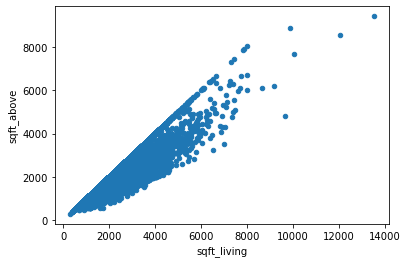

In [36]:
df.plot(kind='scatter',x='sqft_living',y='sqft_above')

In [37]:
x=df[['sqft_living']]   #independent feature
y=df[['sqft_above']]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=21)

In [39]:
data=LinearRegression()

In [40]:
data.fit(x_train,y_train)

LinearRegression()

In [41]:
data.intercept_

array([146.83925855])

In [42]:
len(x_train)

17290

In [43]:
data.coef_

array([[0.78877875]])

In [44]:
data.rank_

1

In [45]:
predict=data.predict(x_train)
predict

array([[1448.32420203],
       [2063.57162985],
       [1511.42650232],
       ...,
       [1286.62455753],
       [1479.87535217],
       [1866.37694144]])

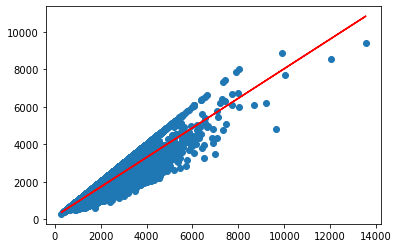

In [46]:
plt.scatter(x_train,y_train)
plt.plot(x_train.values,data.predict(x_train),'r')

In [47]:
y_pred_test=data.predict(x_test)
y_pred_test,y_test

(array([[1148.58827565],
        [2039.90826724],
        [1684.95782811],
        ...,
        [ 793.63783652],
        [1361.55853913],
        [ 722.6477487 ]]),
        sqft_above
 5294         1270
 19430        2400
 10728        1520
 12080        1260
 15156        1720
 ...           ...
 4305         1460
 13925         960
 21381         820
 6364         1020
 3837          730
 
 [4323 rows x 1 columns])

In [48]:
data.score(x_test,y_test)

0.7687174364614728

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

152877.8431673922
318.33067247410406
390.99596310881805


In [53]:
data.predict([x_test.iloc[1]])

C:\Users\Abdul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2039.90826724]])

C:\Users\Abdul\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sqft_above
Feature names seen at fit time, yet now missing:
- sqft_living

  warnings.warn(message, FutureWarning)


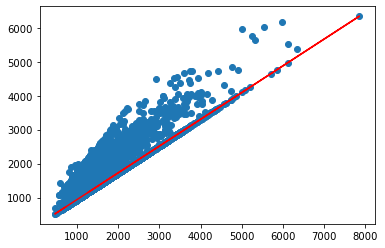

In [54]:
plt.scatter(y_test,y_pred_test)
plt.plot(y_test.values,data.predict(y_test),'r')